In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/day.csv


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: record index
* dteday : date
* season : season (1:winter, 2:spring, 3:summer, 4:fall)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered


### Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

### Loading the Dataset

In [65]:
day_url = '/kaggle/input/bike-sharing-dataset/hour.csv'
df = pd.read_csv(day_url)

In [66]:
# Display data
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [67]:
# Info about datatypes in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We can convert the datatype of ['season','yr','month','holiday','weekday','workingday','weathersit']

In [68]:
# Statistical Info about the dataset
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Here, we can see that all the numerical columns are normally distributed.

In [69]:
df.apply(lambda x:len( x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Data Preprocessing

In [70]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [72]:
# Remove some irrelevant columns
df = df.drop(columns={'instant','dteday','yr'})
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [73]:
# Converting the dtype of columns
cols = ['season','mnth','hr','holiday','weekday','workingday','weathersit']
for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   mnth        17379 non-null  category
 2   hr          17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weathersit  17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


### Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Count of Bikes during WeekDays and Weekends')

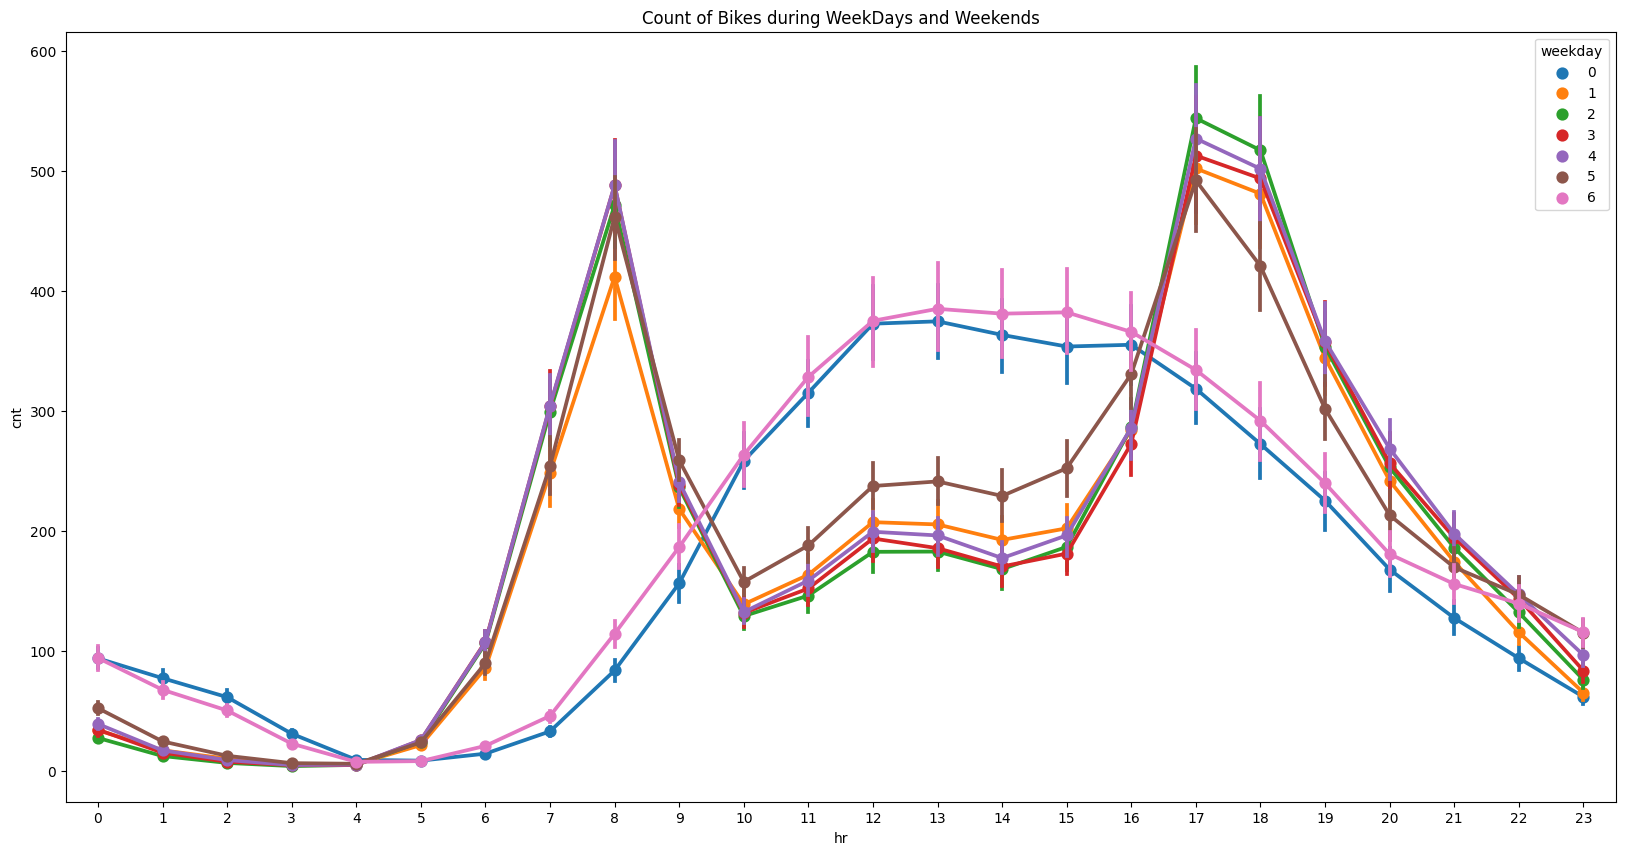

In [74]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df,x='hr',y='cnt',hue='weekday')
plt.title('Count of Bikes during WeekDays and Weekends')

From this visualization, we can conclude that on weekdays the high peak timing is of morning and evening hours, which we can say of any job. And during weekends, peak time is afternoon as go out for relaxation after resting specially on Saturdays. 

Text(0.5, 1.0, 'Count of Bikes during Different Weather')

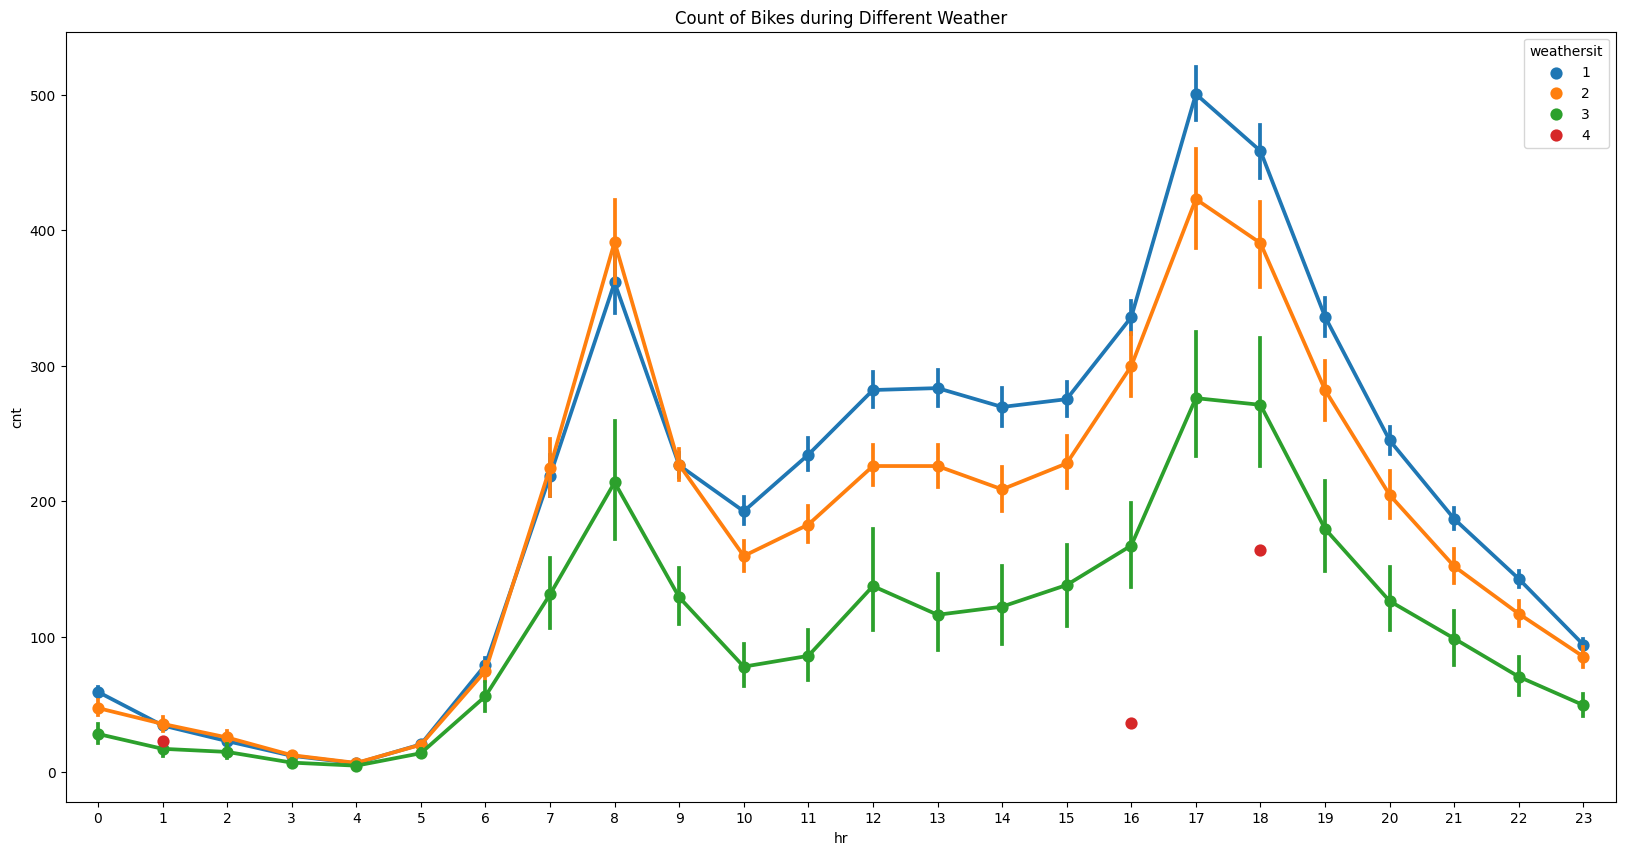

In [75]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df,x='hr',y='cnt',hue='weathersit')
plt.title('Count of Bikes during Different Weather')

From this, we can conclude that on clear weather, people go out while on rainy day, there are almost no users.

Text(0.5, 1.0, 'Count of Bikes during WeekDays and Weekends by Unregistered Users')

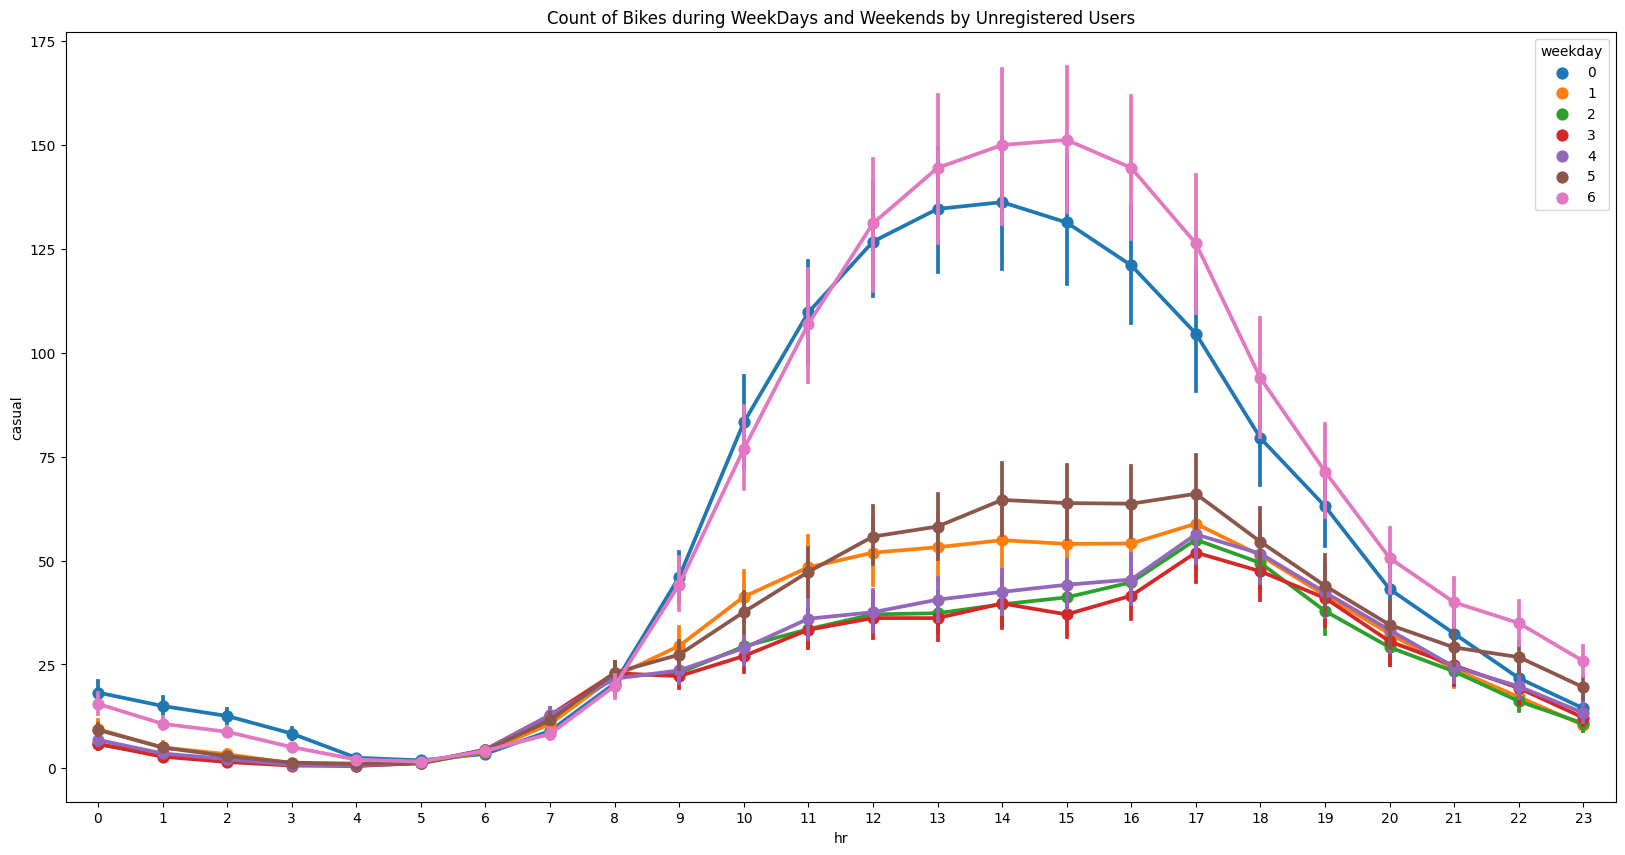

In [76]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df,x='hr',y='casual',hue='weekday')
plt.title('Count of Bikes during WeekDays and Weekends by Unregistered Users')

Here, high number of vehicles are used only on weekends by unregistered users.

Text(0.5, 1.0, 'Count of Bikes during WeekDays and Weekends By Registered Users')

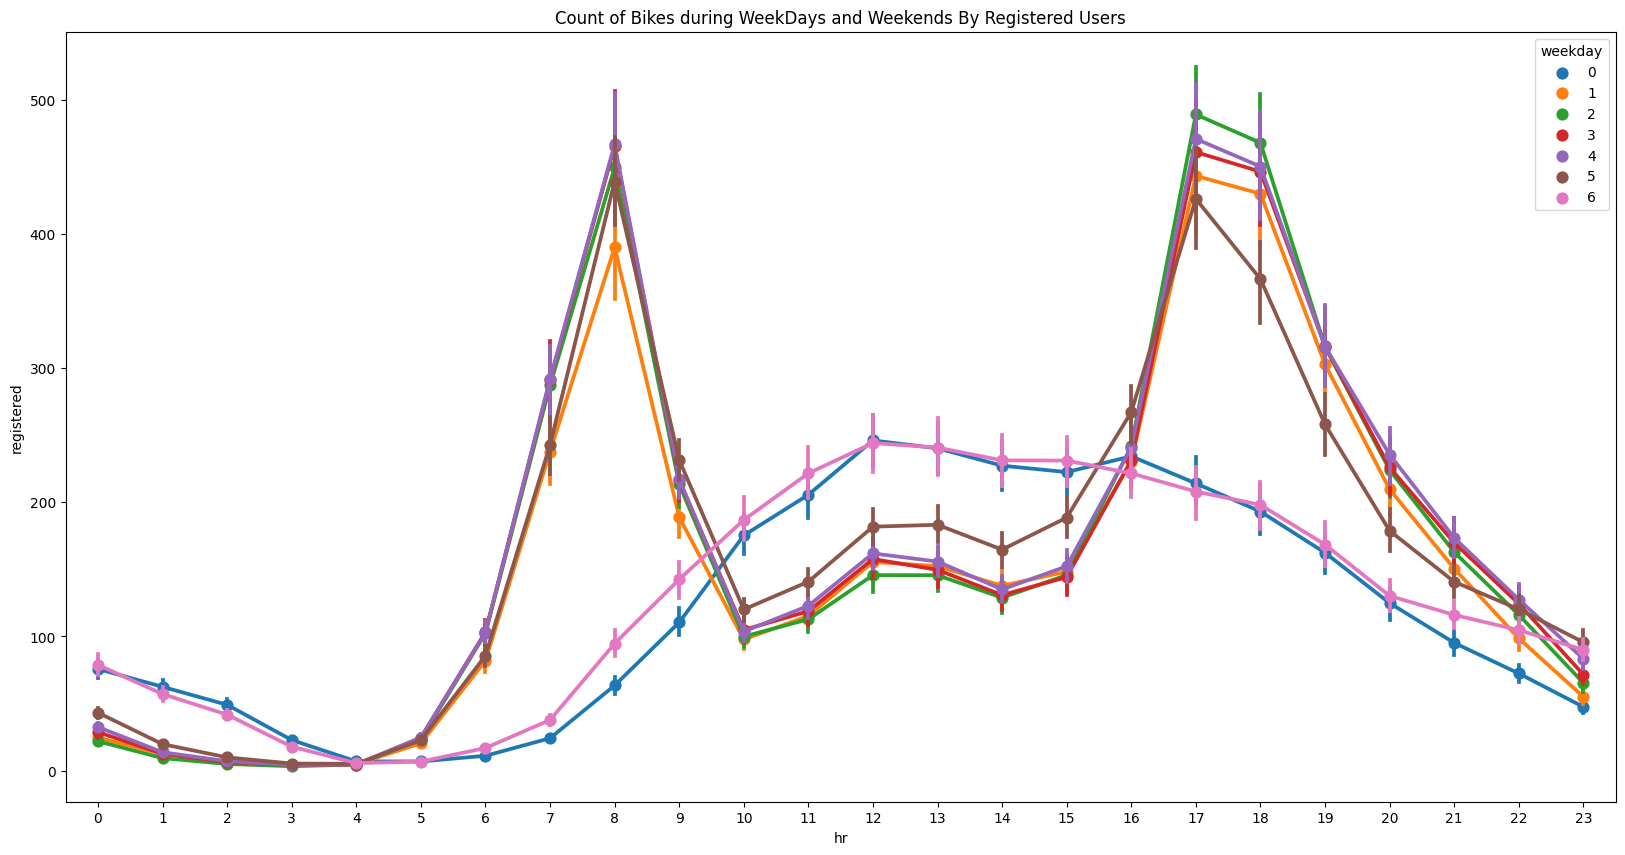

In [77]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df,x='hr',y='registered',hue='weekday')
plt.title('Count of Bikes during WeekDays and Weekends By Registered Users')

It is generally same, like they use mostly during weekdays and low on weekends.

Text(0.5, 1.0, 'Count of Bikes during Different Months')

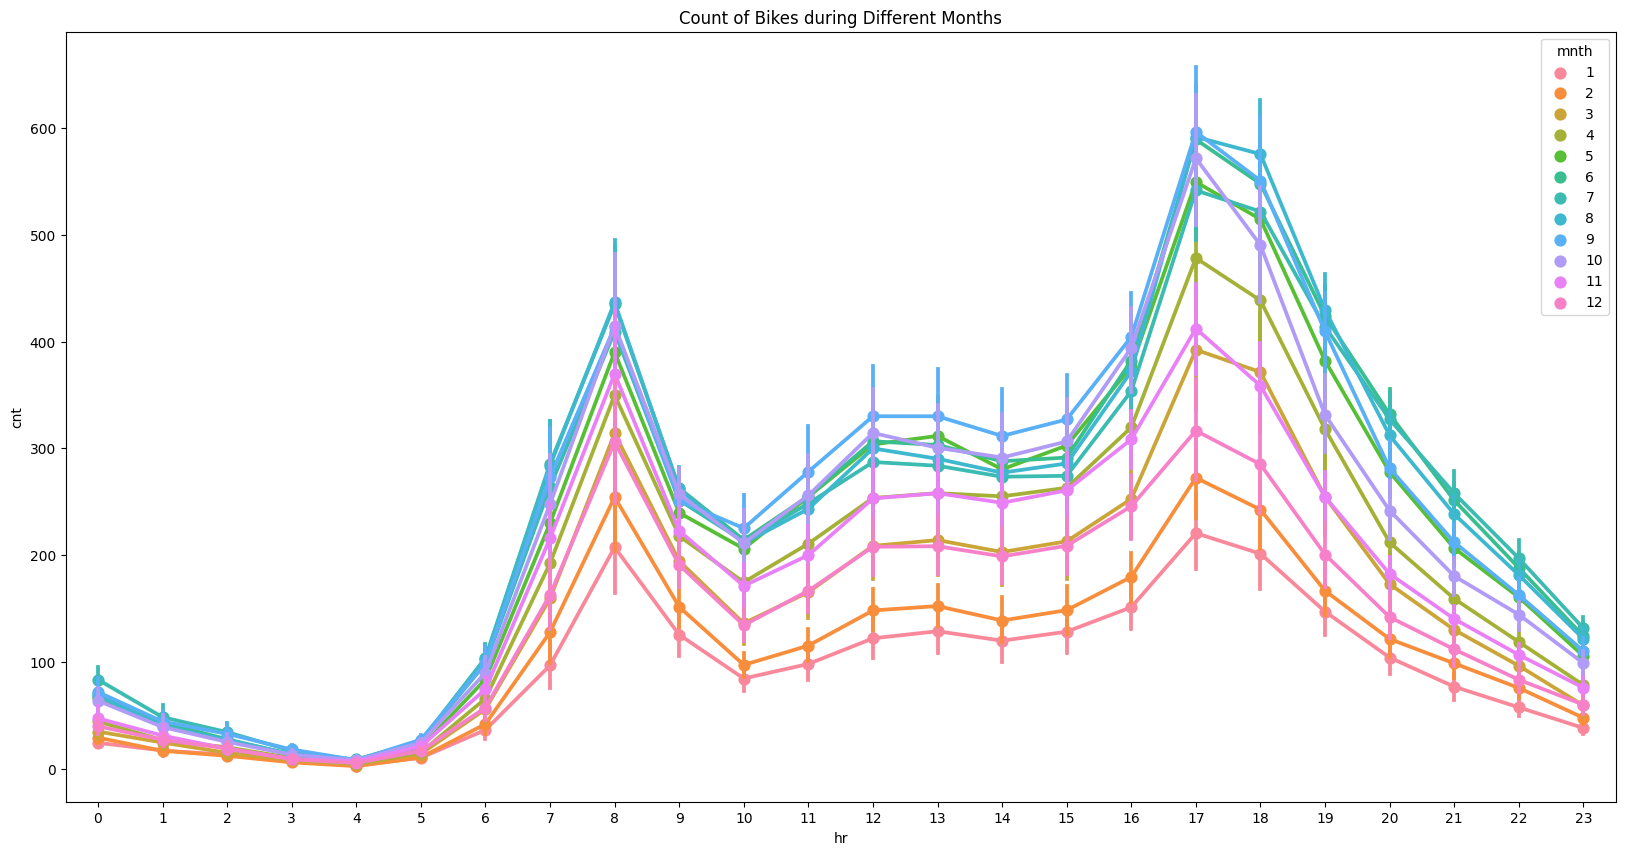

In [78]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df,x='hr',y='cnt',hue='mnth')
plt.title('Count of Bikes during Different Months')

As year started, number of bookings increased and as coming to the end, it starts decreasing in the season of Winter

Text(0.5, 1.0, 'Count of Bikes during Different Seasons')

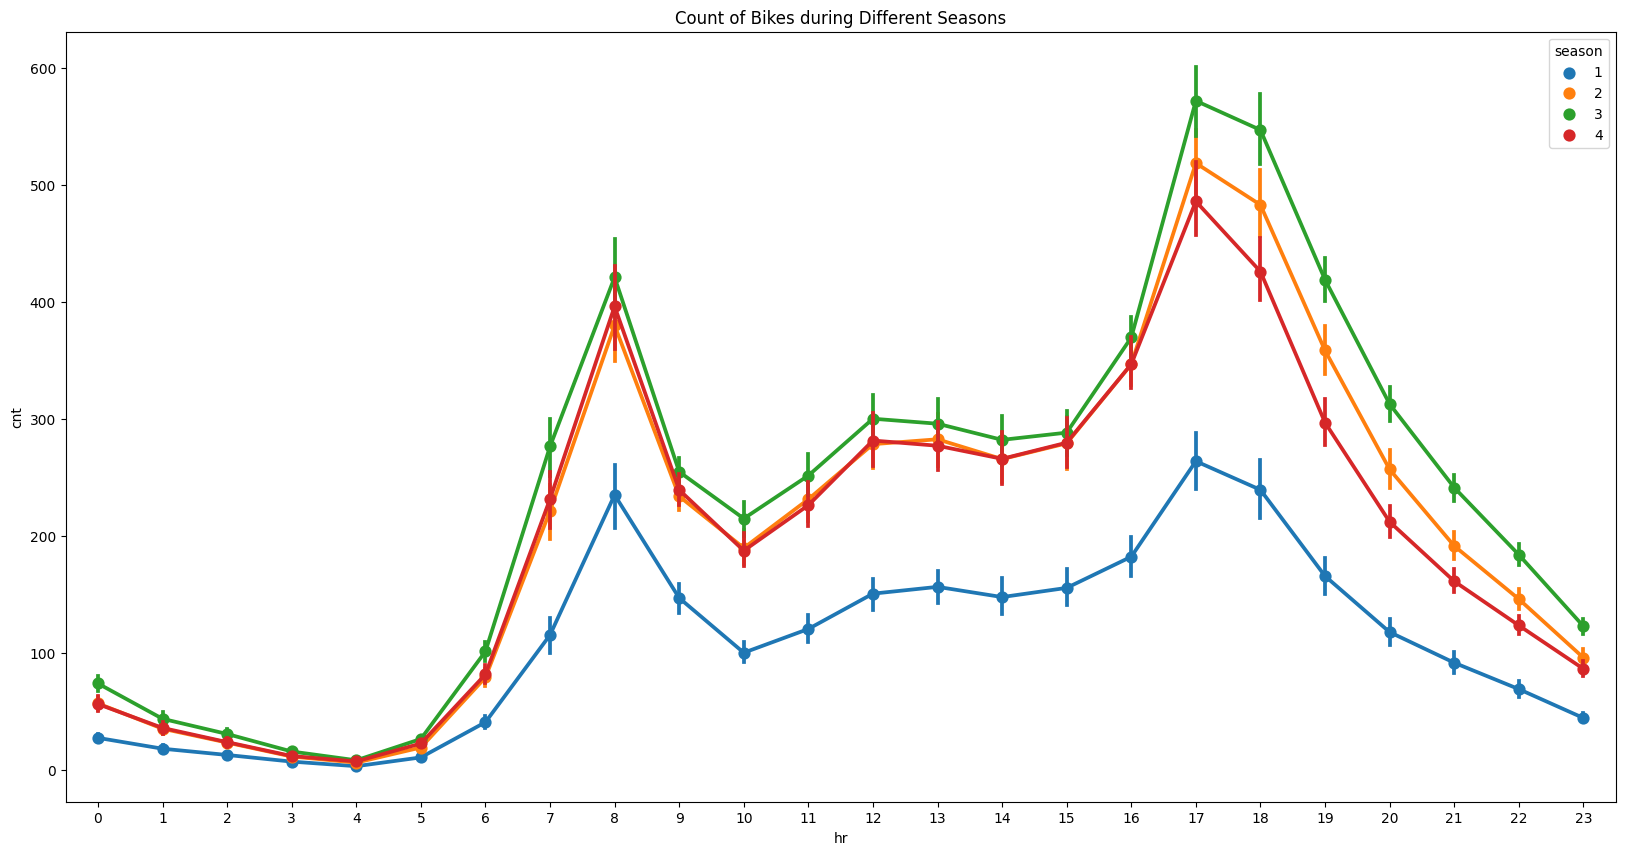

In [79]:
plt.figure(figsize=(20,10))
sns.pointplot(data=day_df,x='hr',y='cnt',hue='season')
plt.title('Count of Bikes during Different Seasons')

Lowest Bikes are used in Winter Season and high in Summer Season

<Axes: xlabel='temp', ylabel='cnt'>

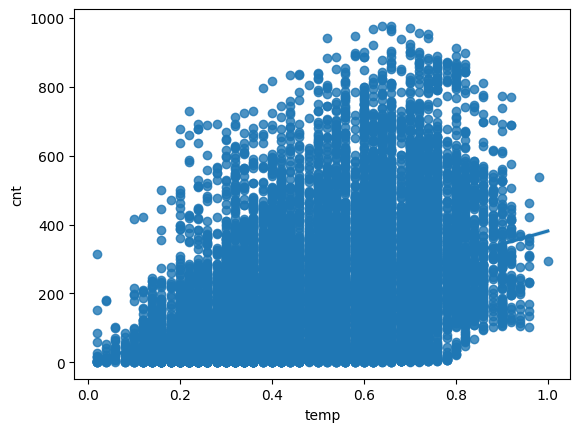

In [80]:
sns.regplot(data=df,x=df['temp'],y=df['cnt'])

<Axes: xlabel='hum', ylabel='cnt'>

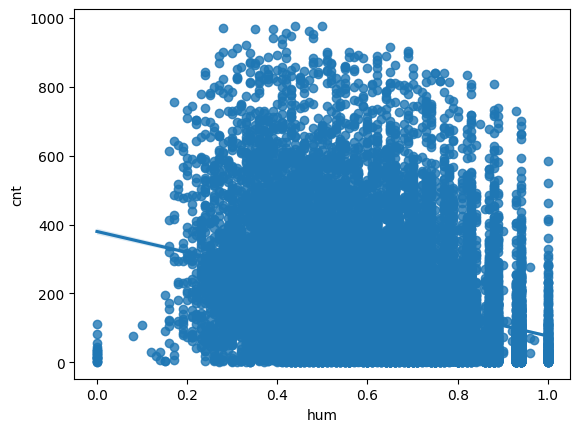

In [81]:
sns.regplot(data=df,x=df['hum'],y=df['cnt'])

Text(0.5, 1.0, 'Theoritical Quantiles')

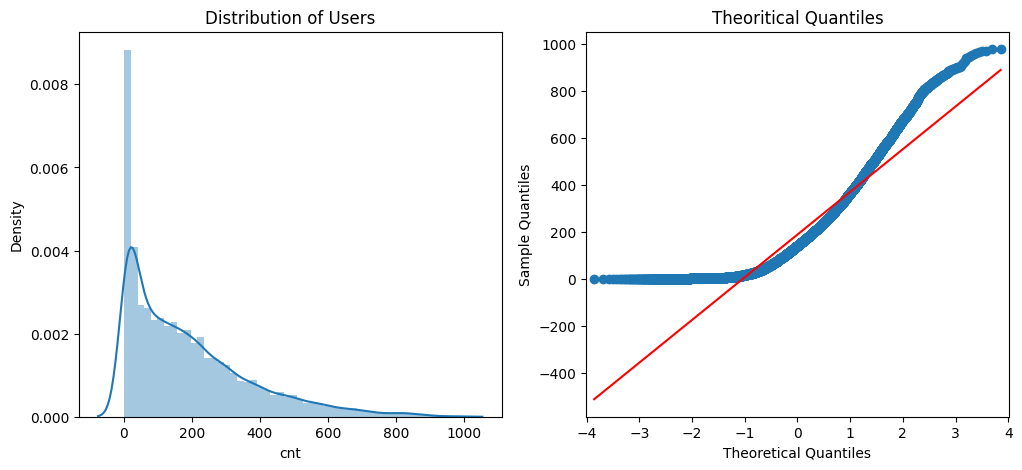

In [82]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.distplot(df['cnt'],ax=ax1)
ax1.set_title('Distribution of Users')
qqplot(df['cnt'],ax=ax2,line='s')
ax2.set_title('Theoritical Quantiles')

Text(0.5, 1.0, 'Theoritical Quantiles')

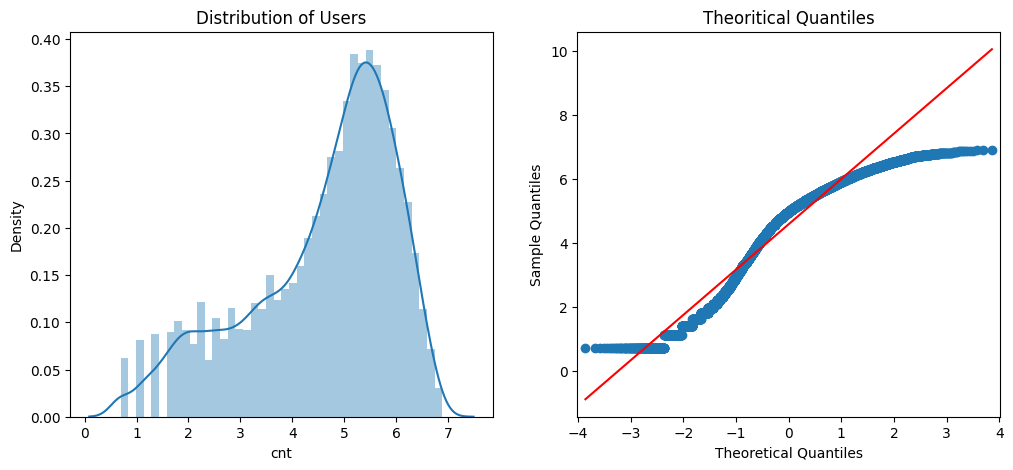

In [83]:
df['cnt'] = np.log(df['cnt']+1)
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.distplot(df['cnt'],ax=ax1)
ax1.set_title('Distribution of Users')
qqplot(df['cnt'],ax=ax2,line='s')
ax2.set_title('Theoritical Quantiles')

### Correlation Matrix

<Axes: >

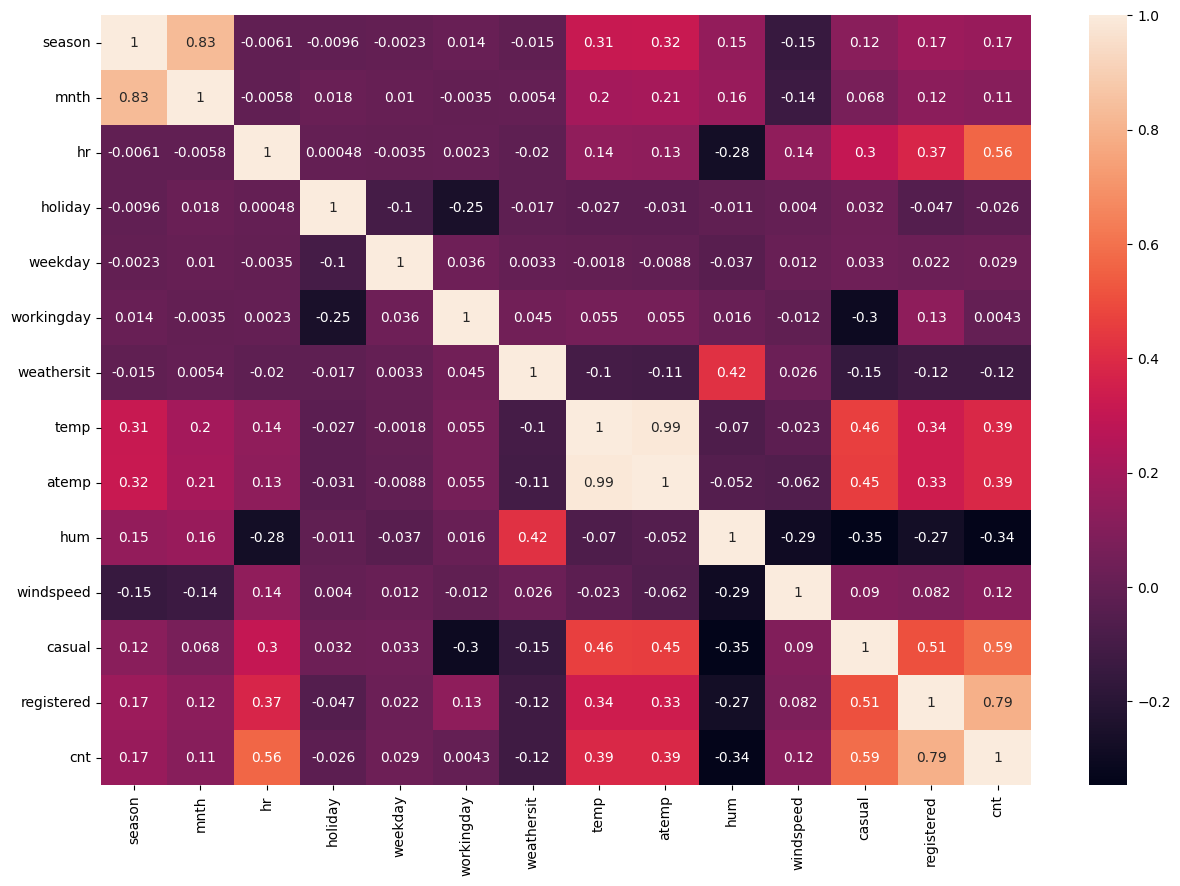

In [84]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

From this visualization, we can conclude that count is dependent on Casual, registered, temp and hr. 
But their are some features which are dependent on each other i.e. Multi-Collinearity exits. That's why we should remove those columns.

In [85]:
df = df.drop(columns={'atemp','hum','casual','registered','windspeed'})
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,cnt
0,1,1,0,0,6,0,1,0.24,2.833213
1,1,1,1,0,6,0,1,0.22,3.713572
2,1,1,2,0,6,0,1,0.22,3.496508
3,1,1,3,0,6,0,1,0.24,2.639057
4,1,1,4,0,6,0,1,0.24,0.693147


### One Hot Encoding

In [61]:
# Converting the dtype of columns
cols = ['season','mnth','hr','holiday','weekday','workingday','weathersit']
def one_hot_encoding(data,column):
    data = pd.concat([data,pd.get_dummies(df[column],prefix=column,drop_first=True)],axis=1)
    data = data.drop([column],axis=1)
    return data

In [86]:
for col in cols:
    df = one_hot_encoding(df,col);
df.head()

,temp,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,2.833213,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0.22,3.713572,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.22,3.496508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.24,2.639057,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0.24,0.693147,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


### Model Training

In [94]:
X = df.drop(columns={'cnt'})
y = df['cnt']

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

models = [LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(), DecisionTreeRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]

In [98]:
from sklearn import model_selection
def model_training(model):
    folds = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model,X,y,cv=folds,scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print("Model: ",model)
    print("CV Score: ",abs(cv_score))

In [99]:
for model in models:
    model_training(model)

Model:  LinearRegression()
CV Score:  0.5786196398700251
Model:  Ridge()
CV Score:  0.579812016467328
Model:  HuberRegressor()
CV Score:  0.6084881782255394
Model:  ElasticNetCV()
CV Score:  0.5777769068168611
Model:  DecisionTreeRegressor()
CV Score:  0.5431407111234874
Model:  RandomForestRegressor()
CV Score:  0.3644189438020618
Model:  ExtraTreesRegressor()
CV Score:  0.3891017451815732
Model:  GradientBoostingRegressor()
CV Score:  0.4475677273580011


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([5.907522  , 3.88949793, 2.4915678 , ..., 4.40984897, 5.52439326,
       5.93125583])

In [104]:
y_test

12830    6.054439
8688     4.488636
7091     1.609438
12230    6.267201
431      2.639057
           ...   
6759     2.890372
13989    4.454347
173      4.595120
16192    5.587249
8211     5.590987
Name: cnt, Length: 3476, dtype: float64

In [105]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.4594649423443625